In [225]:
import tensorflow as tf
from packaging import version
import tensorboard as tb
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb
import os
import numpy as np

In [226]:
tf.__version__

'2.11.0'

In [227]:
# current_dir = os.getcwd()
# current_dir

In [228]:
# df = pd.read_csv('C:\\Users\\ASUS\\Documents\\mac m1\\GymPDE\\csv_runs\\run-double_agent_4-tag-Cooperation level.csv')
# df = pd.read_csv('C:\\Users\\ASUS\\Documents\\mac m1\\GymPDE\\csv_runs\\csvfile.csv')

df_flat = pd.read_csv('..\\csv_runs\\run-double_agent_0.5flat2-tag-Cooperation level.csv').filter(['Step', 'Value'])
df_good = pd.read_csv('..\\csv_runs\\run-double_agent_4-tag-Cooperation level.csv').filter(['Step', 'Value'])
df_good

,Step,Value
0,167,0.75
1,474,0.25
2,536,0.50
3,586,0.25
4,2307,0.50
...,...,...
995,997990,1.00
996,998445,1.00
997,999065,1.00
998,999994,1.00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\892540892.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


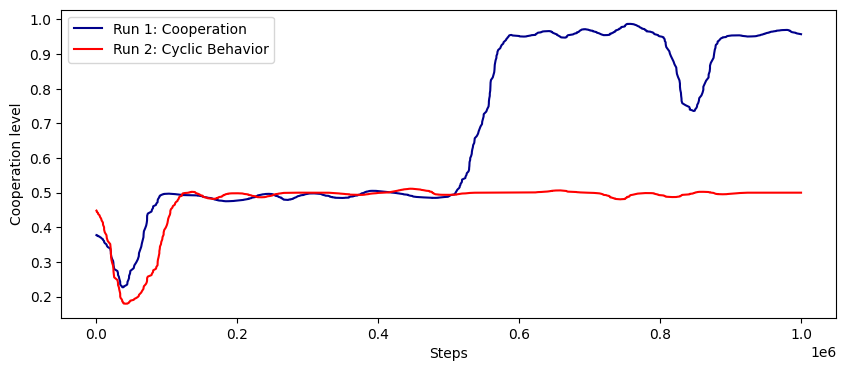

In [229]:
from scipy.ndimage.filters import gaussian_filter1d

fig, ax = plt.subplots(ncols=1, figsize=(10,4))

#plot 1:
df_good_smooth = gaussian_filter1d(df_good['Value'], sigma=15)

ax.plot(df_good['Step'], df_good_smooth, color='darkblue')

# error bar plot 2:
y = df_good_smooth
err = (1 - y) / 2

upper = gaussian_filter1d(y + err, sigma=3)
lower = gaussian_filter1d(y - err, sigma=3)

# ax.errorbar(df_good['Step'], y, err, color='dodgerblue', alpha = 0.03)



# plot 2:
df_flat_smooth = gaussian_filter1d(df_flat['Value'], sigma=15)


ax.plot(df_flat['Step'], df_flat_smooth, color='red')

# error bar plot 1:
y = df_flat_smooth
err = (1 - y) / 50

upper = gaussian_filter1d(y + err, sigma=3)
lower = gaussian_filter1d(y - err, sigma=3)

# ax.errorbar(df_good['Step'], y, err, color='lightcoral', alpha = 0.03)



# ax.plot(df_good['Step'], df_good[:,0], '--', linewidth=0.7, color='k', alpha=0.45)

# ax.fill_between(y_pos, upper_err, lower_err, color='crimson', alpha=0.2)
plt.legend(['Run 1: Cooperation', 'Run 2: Cyclic Behavior'])
plt.xlabel('Steps')
plt.ylabel('Cooperation level')

plt.show()

In [230]:
df_actions = pd.read_csv('..\\csv_runs\\run-20221208-133616-tag-Agent_0 cooperation reward.csv').filter(['Step', 'Value'])
df_coop = pd.read_csv('..\\csv_runs\\run-20221208-133616-tag-Cooperation level.csv').filter(['Step', 'Value'])


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8060\2803769579.py:1: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d


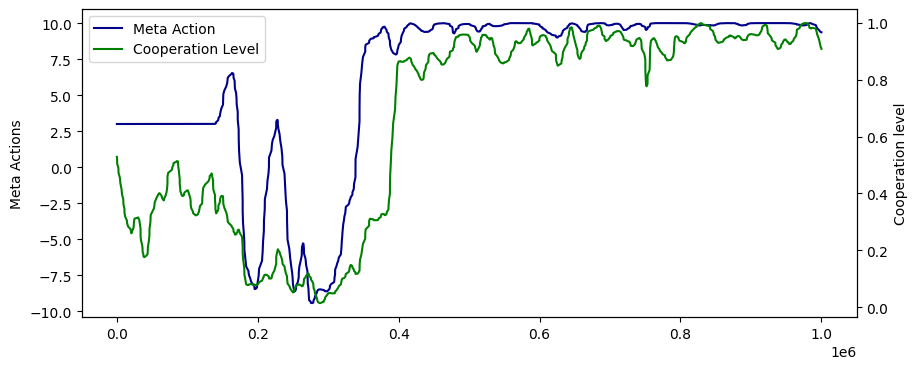

In [234]:
from scipy.ndimage.filters import gaussian_filter1d

fig, ax1 = plt.subplots(ncols=1, figsize=(10,4))

# df_actions['Value'] /= df_actions['Value'].median()
#plot 1:
df_actions_smooth = gaussian_filter1d(df_actions['Value'], sigma=5)

ax1.plot(df_actions['Step'], df_actions_smooth, color='darkblue', label ='Meta Action')

ax1.set_ylabel('Meta Actions')


# error bar plot 2:
y = df_actions_smooth
err = (1 - y) / 2

upper = gaussian_filter1d(y + err, sigma=3)
lower = gaussian_filter1d(y - err, sigma=3)

# ax.errorbar(df_actions['Step'], y, err, color='dodgerblue', alpha = 0.03)

# df_coop['Value'] /= df_coop['Value'].median()


# plot 2:
df_coop_smooth = gaussian_filter1d(df_coop['Value'], sigma=5)

ax2 = ax1.twinx()


ax2.plot(df_coop['Step'], df_coop_smooth, color='green', label='Cooperation Level')

ax2.set_ylabel('Cooperation Level')

# # added these three lines
# lns = ax1+ax2
# labs = [l.get_label() for l in lns]
# ax.legend(lns, labs, loc=0)


# ax2.legend()

fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)


# error bar plot 1:
y = df_coop_smooth
err = (1 - y) / 50

upper = gaussian_filter1d(y + err, sigma=3)
lower = gaussian_filter1d(y - err, sigma=3)

# ax.errorbar(df_actions['Step'], y, err, color='lightcoral', alpha = 0.03)


# ax.fill_between(y_pos, upper_err, lower_err, color='crimson', alpha=0.2)
# plt.legend(['Meta Actions', 'Cooperation Level'])
plt.xlabel('Steps')
plt.ylabel('Cooperation level')

plt.show()

In [235]:
# from scipy.ndimage.filters import gaussian_filter1d

# x = np.linspace(0, 100, 100)
# y = 0.95 - ((50 - x) / 200) ** 2
# err = (1 - y) / 2
# y += np.random.normal(0, err / 10, y.size)

# upper = gaussian_filter1d(y + err, sigma=3)
# lower = gaussian_filter1d(y - err, sigma=3)

# fig, ax = plt.subplots(ncols=2)

# ax[0].errorbar(x, y, err, color='dodgerblue')

# ax[1].plot(x, y, color='dodgerblue')
# ax[1].fill_between(x, upper, lower, color='crimson', alpha=0.2)

# plt.show()